<a href="https://colab.research.google.com/github/luthfisaputra/Customer-Feedback-Satisfaction-Analysis/blob/main/Analisis_Survey_Kepuasan_Pelanggan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import dataset csv
file_path = '/content/customer_feedback_satisfaction.csv'
df = pd.read_csv(file_path)

df.head()

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


In [3]:
# informasi dataset
df.info()
# statistik deskriptif
df.describe()
# cek nilai yang hilang
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         38444 non-null  int64  
 1   Age                38444 non-null  int64  
 2   Gender             38444 non-null  object 
 3   Country            38444 non-null  object 
 4   Income             38444 non-null  int64  
 5   ProductQuality     38444 non-null  int64  
 6   ServiceQuality     38444 non-null  int64  
 7   PurchaseFrequency  38444 non-null  int64  
 8   FeedbackScore      38444 non-null  object 
 9   LoyaltyLevel       38444 non-null  object 
 10  SatisfactionScore  38444 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 3.2+ MB


,0
CustomerID,0
Age,0
Gender,0
Country,0
Income,0
ProductQuality,0
ServiceQuality,0
PurchaseFrequency,0
FeedbackScore,0
LoyaltyLevel,0


In [5]:
# hapus baris duplikat
df = df.drop_duplicates()

In [17]:
# statistik deskriptif dasar
desc = df.describe(include='all')
desc

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
count,38444.000000,38444.000000,38444,38444,38444.000000,38444.000000,38444.000000,38444.000000,38444,38444,38444.000000
unique,NaN,NaN,2,5,NaN,NaN,NaN,NaN,3,3,NaN
top,NaN,NaN,Female,USA,NaN,NaN,NaN,NaN,High,Gold,NaN
freq,NaN,NaN,19294,7762,NaN,NaN,NaN,NaN,12918,12912,NaN
mean,19222.500000,43.496853,NaN,NaN,75076.619238,5.494746,5.492769,10.453881,NaN,NaN,85.276409
std,11097.971211,14.972748,NaN,NaN,25975.752966,2.873192,2.875812,5.765621,NaN,NaN,16.898577
min,1.000000,18.000000,NaN,NaN,30001.000000,1.000000,1.000000,1.000000,NaN,NaN,4.280000
25%,9611.750000,31.000000,NaN,NaN,52624.500000,3.000000,3.000000,5.000000,NaN,NaN,74.470000
50%,19222.500000,43.000000,NaN,NaN,75236.000000,5.000000,5.000000,10.000000,NaN,NaN,91.270000
75%,28833.250000,56.000000,NaN,NaN,97606.750000,8.000000,8.000000,15.000000,NaN,NaN,100.000000


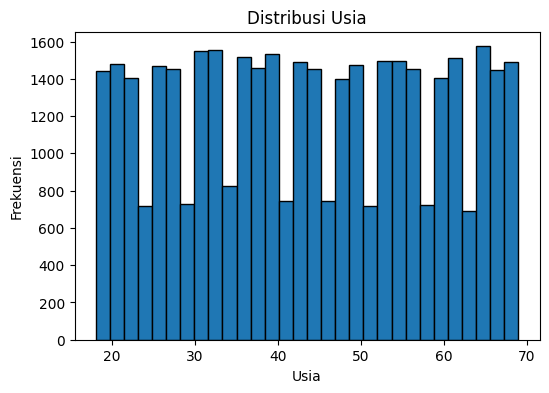

In [19]:
# distribusi usia
plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=30, edgecolor="black")
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

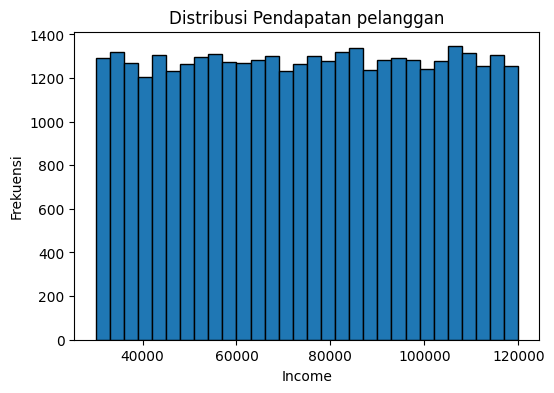

In [25]:
# distribusi income
plt.figure(figsize=(6,4))
plt.hist(df['Income'], bins=30, edgecolor="black")
plt.title('Distribusi Pendapatan pelanggan')
plt.xlabel('Income')
plt.ylabel('Frekuensi')
plt.show()


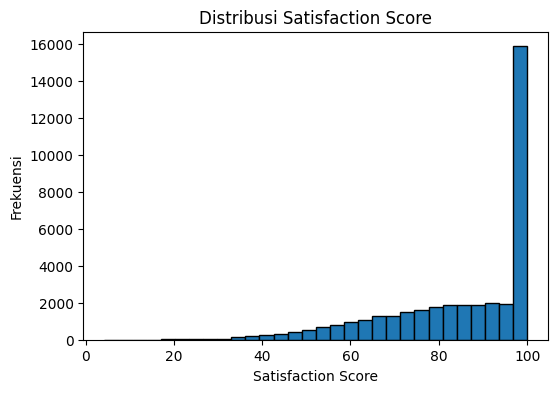

In [21]:
# distribusi satisfaction score
plt.figure(figsize=(6,4))
plt.hist(df['SatisfactionScore'], bins=30, edgecolor="black")
plt.title('Distribusi Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frekuensi')
plt.show()

<Figure size 600x400 with 0 Axes>

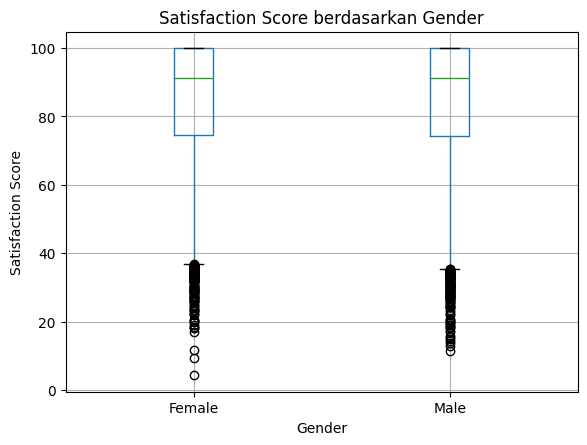

In [22]:
# gander vs satisfactionscore
plt.figure(figsize=(6,4))
df.boxplot(column='SatisfactionScore', by='Gender')
plt.title('Satisfaction Score berdasarkan Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Satisfaction Score')
plt.show()

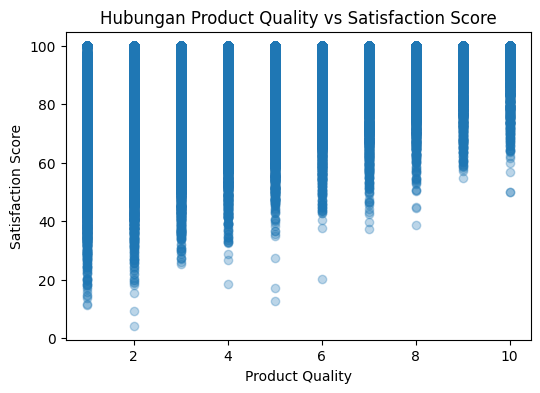

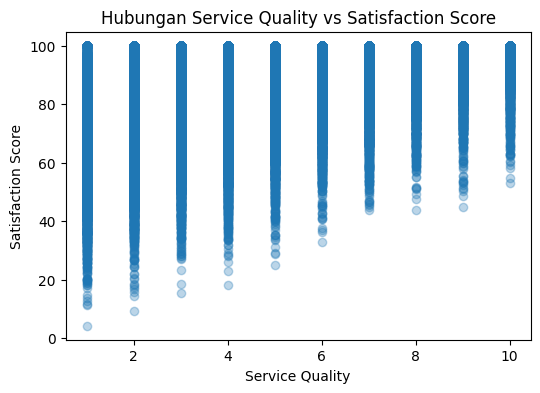

In [24]:
# hubungan produck quality & satisfaction
plt.figure(figsize=(6,4))
plt.scatter(df['ProductQuality'], df['SatisfactionScore'], alpha=0.3)
plt.title('Hubungan Product Quality vs Satisfaction Score')
plt.xlabel('Product Quality')
plt.ylabel('Satisfaction Score')
plt.show()

# hubungan service quality & satisfaction
plt.figure(figsize=(6,4))
plt.scatter(df['ServiceQuality'], df['SatisfactionScore'], alpha=0.3)
plt.title('Hubungan Service Quality vs Satisfaction Score')
plt.xlabel('Service Quality')
plt.ylabel('Satisfaction Score')
plt.show()

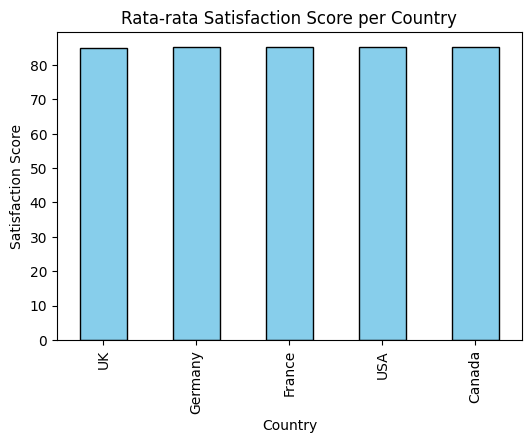

In [26]:
# 1. Rata-rata Satisfaction per Country
country_satisfaction = df.groupby("Country")["SatisfactionScore"].mean().sort_values()

plt.figure(figsize=(6,4))
country_satisfaction.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Rata-rata Satisfaction Score per Country")
plt.ylabel("Satisfaction Score")
plt.xlabel("Country")
plt.show()

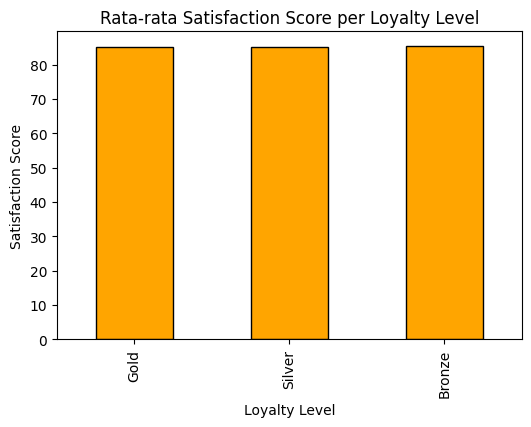

In [27]:
# 2. Rata-rata Satisfaction per LoyaltyLevel
loyalty_satisfaction = df.groupby("LoyaltyLevel")["SatisfactionScore"].mean().sort_values()

plt.figure(figsize=(6,4))
loyalty_satisfaction.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Rata-rata Satisfaction Score per Loyalty Level")
plt.ylabel("Satisfaction Score")
plt.xlabel("Loyalty Level")
plt.show()

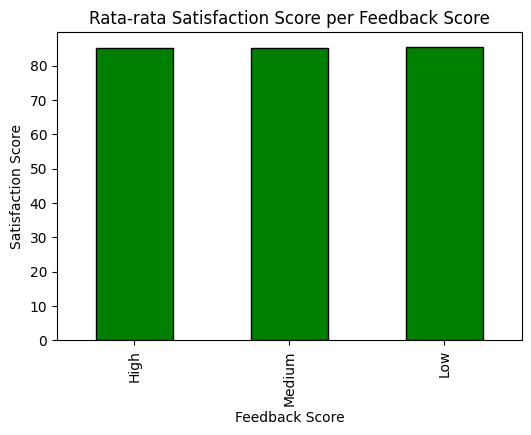

In [28]:
# 3. Rata-rata Satisfaction per FeedbackScore
feedback_satisfaction = df.groupby("FeedbackScore")["SatisfactionScore"].mean().sort_values()

plt.figure(figsize=(6,4))
feedback_satisfaction.plot(kind="bar", color="green", edgecolor="black")
plt.title("Rata-rata Satisfaction Score per Feedback Score")
plt.ylabel("Satisfaction Score")
plt.xlabel("Feedback Score")
plt.show()

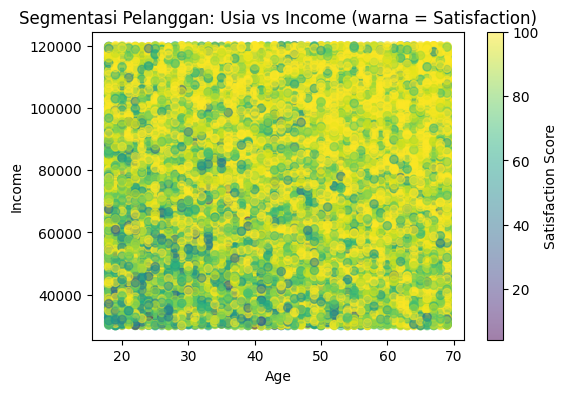

In [29]:
# 4. Segmentasi Usia & Pendapatan terhadap Satisfaction (scatter)
plt.figure(figsize=(6,4))
plt.scatter(df["Age"], df["Income"], c=df["SatisfactionScore"], cmap="viridis", alpha=0.5)
plt.colorbar(label="Satisfaction Score")
plt.title("Segmentasi Pelanggan: Usia vs Income (warna = Satisfaction)")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()